In [40]:
import numpy as np
from matplotlib import pyplot as plt
import module.attenuate
import module.motorStatus
import module.Pico
import time

goal = 3
Kp = 0.5
Ki = 0.5
Kd = 0.5
t = 10

x_list = []
y_list = []
x_list.append(0)
y_list.append(0.00)

for i in range(1,t):
    module.motorStatus.AttenuateStatus("./A")
    module.Pico.pico("./P")
    with open("A.txt") as f:
        X1 = f.readlines()[i]
    with open("A.txt") as f:
        X2 = f.readlines()[i-1]
        M1 = int(X2) - int(X1)
    with open("P.txt") as f:
        e2 = goal - float(f.readlines()[i-1])
    with open("P.txt") as f:
        e1 = goal - float(f.readlines()[i])
        e = goal - float(e1) #偏差（e） = 目的値（goal） - 前回の操作量
        M = M1 + Kp * (float(e)-float(e1)) + Ki * float(e) + Kd * ((float(e)-float(e1)) - (float(e1)-float(e2)))
        module.attenuate.attenuateREL(M)
        time.sleep(3)
        x_list.append(i)
        y_list.append(e)
        
        print( )
        print(e)
        print( )

+0047437
5.443278E-0
b'OK\r\n'

0.5278707000000002

+0047436
5.442892E-0
b'OK\r\n'

0.5519566

+0047437
5.443457E-0
b'OK\r\n'

0.5547545999999999

+0047436
5.393679E-0
b'OK\r\n'

0.5950690999999999

+0047437
5.443969E-0
b'OK\r\n'

0.5934567

+0047436
5.443536E-0
b'OK\r\n'

0.6547644999999997

+0047437
5.393344E-0
b'OK\r\n'


KeyboardInterrupt: 

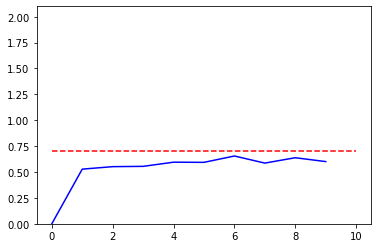

In [38]:

plt.hlines(float(goal)*0.1, 0, t, "red", linestyles='dashed') #ゴールを赤色の点線で表示
plt.plot(x_list, y_list, color="b") #青色でグラフを表示
plt.ylim(0, goal*0.3) #グラフの高さを調整
plt.show()